# 1. Importing the libraries

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Importing the dataset

In [125]:
# Load the dataset
data = pd.read_csv('student-mat.csv', delimiter=';')
# Encode categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data)

# Display the first few rows to ensure encoding is done correctly
print(data_encoded.head())

   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  ...  activities_no  activities_yes  nursery_no  nursery_yes  \
0     1  ...           True           False       False         True   
1     1  ...           True           False        True        False   
2     2  ...           True           False       False         True   
3     1  ...          False            True       False         True   
4     1  ...           True           False       False         True   

   higher_no  higher_yes  internet_no  internet_yes  romantic_no  romantic_yes  
0    

In [126]:
"""
    1. Display the shape of the encoded dataset
"""
print(data_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 59 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                395 non-null    int64
 1   Medu               395 non-null    int64
 2   Fedu               395 non-null    int64
 3   traveltime         395 non-null    int64
 4   studytime          395 non-null    int64
 5   failures           395 non-null    int64
 6   famrel             395 non-null    int64
 7   freetime           395 non-null    int64
 8   goout              395 non-null    int64
 9   Dalc               395 non-null    int64
 10  Walc               395 non-null    int64
 11  health             395 non-null    int64
 12  absences           395 non-null    int64
 13  G1                 395 non-null    int64
 14  G2                 395 non-null    int64
 15  G3                 395 non-null    int64
 16  school_GP          395 non-null    bool 
 17  school_MS       

In [127]:
"""
    1. Display the summary statistics of the encoded dataset
"""
print(data_encoded.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

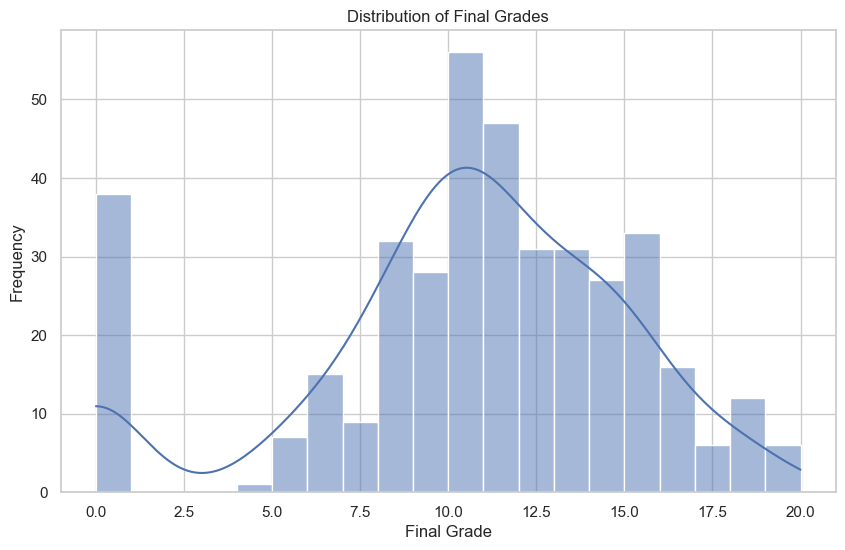

In [128]:
"""
    1. Set the style of the plot to 'whitegrid'
    2. Create a histogram of the final grades (G3) with 20 bins and a kernel density estimate
    3. Set the figure size to 10 x 6
    4. Set the title to 'Distribution of Final Grades'
    5. Set the x-axis label to 'Final Grade'
    6. Set the y-axis label to 'Frequency'
    7. Display the plot
"""


sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data['G3'], bins=20, kde=True)
plt.title('Distribution of Final Grades')
plt.xlabel('Final Grade')
plt.ylabel('Frequency')
plt.show()

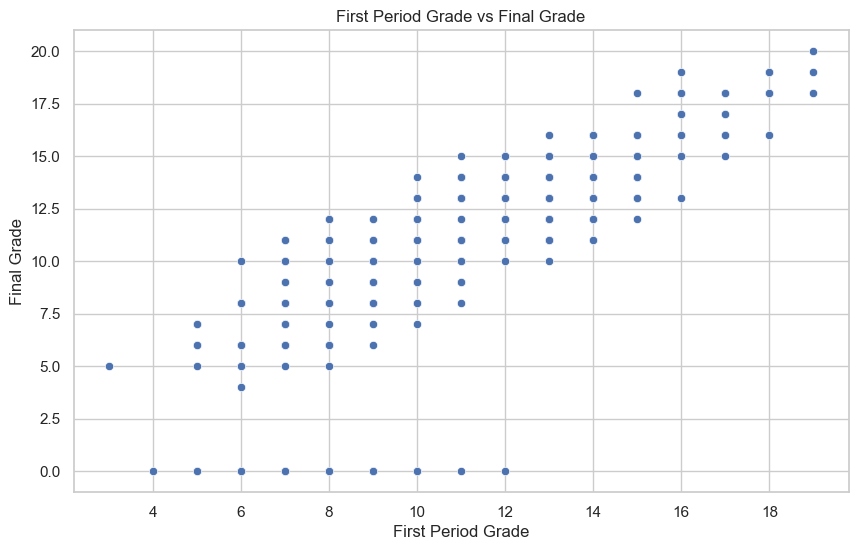

In [129]:
"""
    1. Create a scatter plot of first period grade (G1) vs final grade (G3)
    2. Set the figure size to 10 x 6
    3. Set the title to 'First Period Grade vs Final Grade'
    4. Set the x-axis label to 'First Period Grade'
    5. Set the y-axis label to 'Final Grade'
    6. Display the plot
"""

plt.figure(figsize=(10, 6))
sns.scatterplot(x='G1', y='G3', data=data)
plt.title('First Period Grade vs Final Grade')
plt.xlabel('First Period Grade')
plt.ylabel('Final Grade')
plt.show()

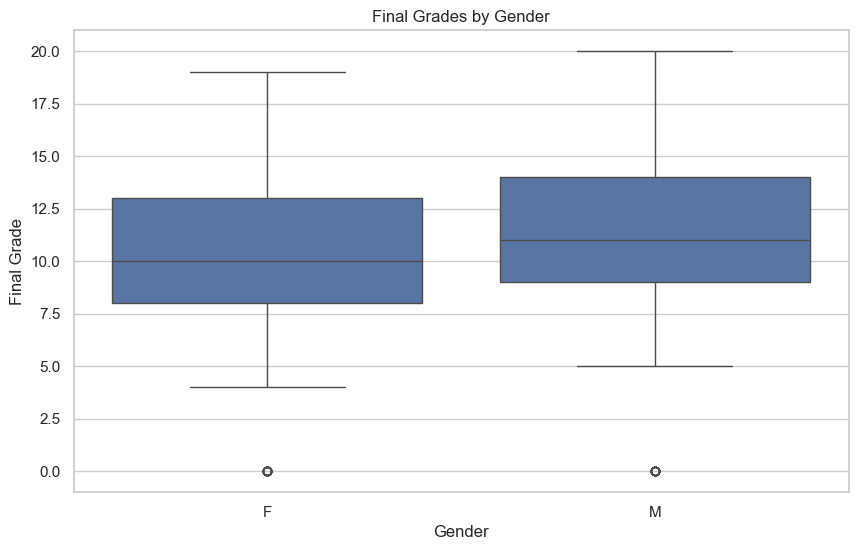

In [130]:
"""
    1 Create a boxplot of final grades by sex
    2 Set the figure size to 10 x 6
    3 Set the title to 'Final Grades
    4 Set the x-axis label 'Gender'
    5 Display the plot
"""


plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='G3', data=data)
plt.title('Final Grades by Gender')
plt.xlabel('Gender')
plt.ylabel('Final Grade')
plt.show()

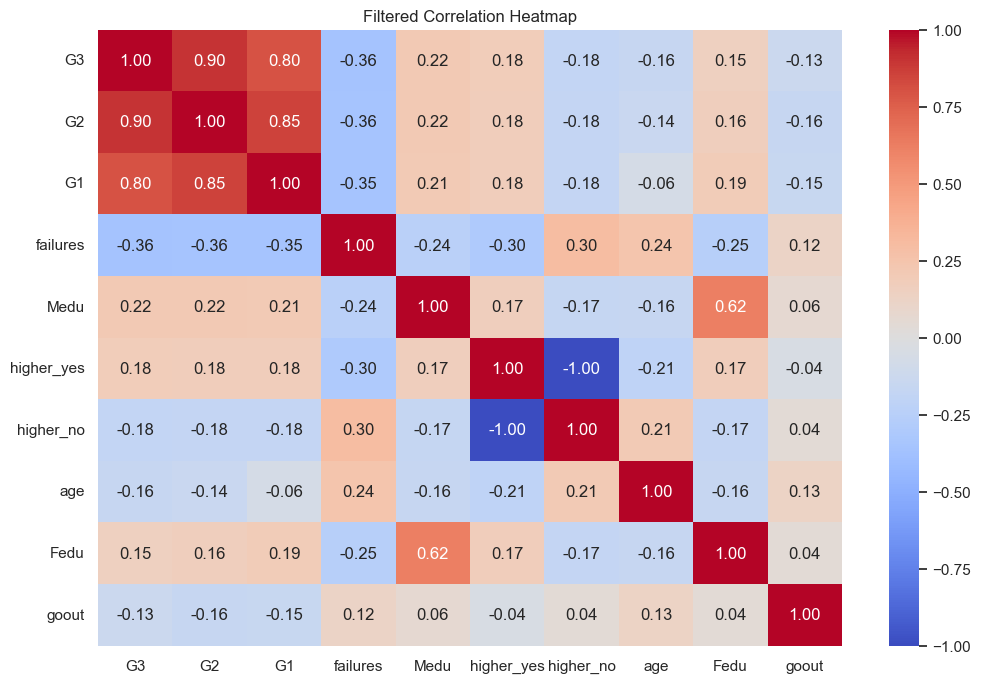

In [131]:
"""
    1. Compute the correlation matrix
    2. Extract the correlation of each feature with the final grade (G3)
    3. Select the top features correlated with G3
    4. Filter the correlation matrix to include only the top features
    5. Plot the filtered correlation heatmap
"""

correlation_matrix = data_encoded.corr()

correlation_with_g3 = correlation_matrix['G3'].abs().sort_values(ascending=False)

top_features = correlation_with_g3.index[:10]

filtered_correlation_matrix = data_encoded[top_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Filtered Correlation Heatmap')
plt.show()

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Select the relevant features
features = ['G1', 'G2', 'failures', 'Medu', 'higher_yes', 'age', 'Fedu', 'goout']
X = data_encoded[features]
y = data_encoded['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
# print(classification_report(y_test, y_pred_lr))

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
# print(classification_report(y_test, y_pred_dt))

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
# print(classification_report(y_test, y_pred_rf))

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
# print(classification_report(y_test, y_pred_knn))


Logistic Regression Accuracy: 0.31645569620253167
Decision Tree Accuracy: 0.4050632911392405
Random Forest Accuracy: 0.4177215189873418
KNN Accuracy: 0.2911392405063291


C:\Users\Mur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [133]:
# Print accuracy of all models
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


Logistic Regression Accuracy: 0.31645569620253167
Decision Tree Accuracy: 0.4050632911392405
Random Forest Accuracy: 0.4177215189873418
KNN Accuracy: 0.2911392405063291
